In [44]:
import pandas as pd
from matplotlib import  pyplot as plt
import seaborn as sns

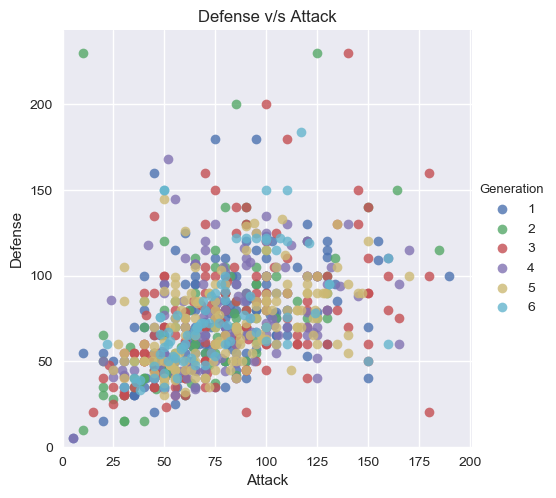

In [84]:
# SCATTER PLOT
# _____________________________________________

plt.style.use('seaborn')

# Seaborn does not have a function for scatter plot
# But we can use lmplot() { Combination of regplot() and FacetGrid ( Multi-plot grid for plotting conditional relationships.
# )} to draw scatter plot

data_frame = pd.read_csv('pokemon_data.csv')


# Regression Line : A regression line is a straight line that describes how a response variable y changes
#                   as an explanatory variable x changes. We often use a regression line to predict the
#                   value of y for a given value of x.
# fit_reg = False (No Regression Line)
# hue='Generation' : Color by evolution stage
sns.lmplot(x='Attack', y='Defense', fit_reg=False, hue='Generation', data=data_frame)

# axes limit
plt.xlim(0, None)
plt.ylim(0, None)


plt.title('Defense v/s Attack')
plt.show()

## ---------------------------------------------------------------------------------------------------------------------

### BOX PLOT

A Box Plot is the visual representation of the statistical five number summary of a given data set.

A Five Number Summary includes:

Minimum
First Quartile
Median (Second Quartile)
Third Quartile
Maximum

![title](boxplot.png)

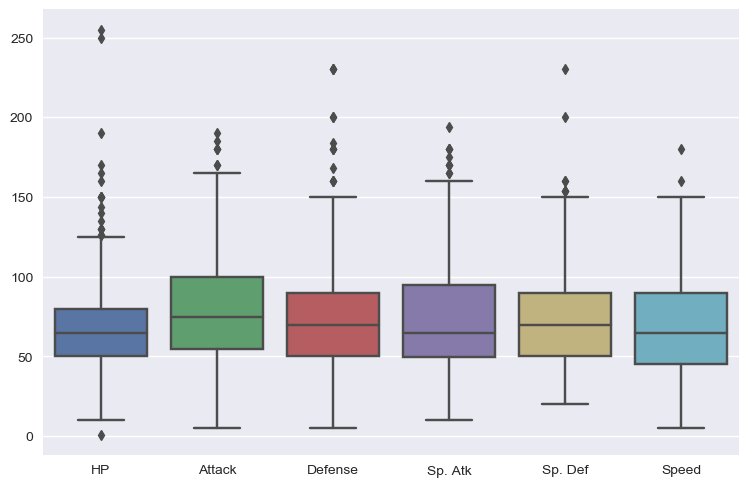

In [73]:
# Plot box plot for our Pokemon's combat stats

# Drop non-combat stats columns from data frame
combat_df = data_frame.drop(['#', 'Generation', 'Legendary'], axis=1)

sns.boxplot(data=combat_df)

plt.show()

### VIOLIN PLOTS

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator (Non-parametric way to estimate probability Density Function[PDF] of a Random Variable) 

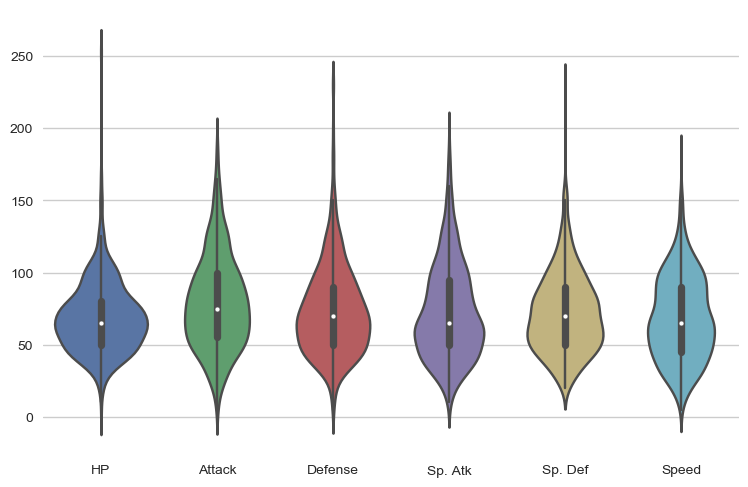

In [82]:

# setting different style
sns.set_style('whitegrid')


# setting different colors
# palette = [colors' list] (Put this in violinplot)

# violin plot
sns.violinplot(data=combat_df)

plt.show()

### SWARM PLOTS

Since we have only 151 pokemon in our dataset, we may want to simply display each point
This is where we use swarm plot
This visualization will show each point, while stacking those with similar values

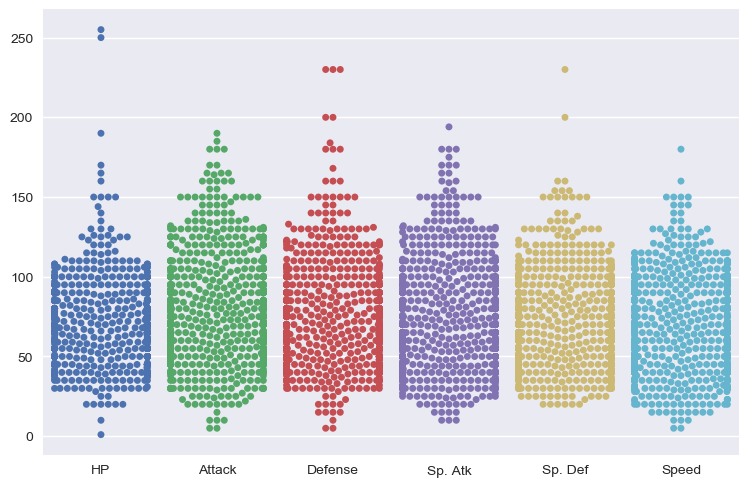

In [86]:
sns.swarmplot(data=combat_df)

plt.show()

### OVERLAYING PLOTS

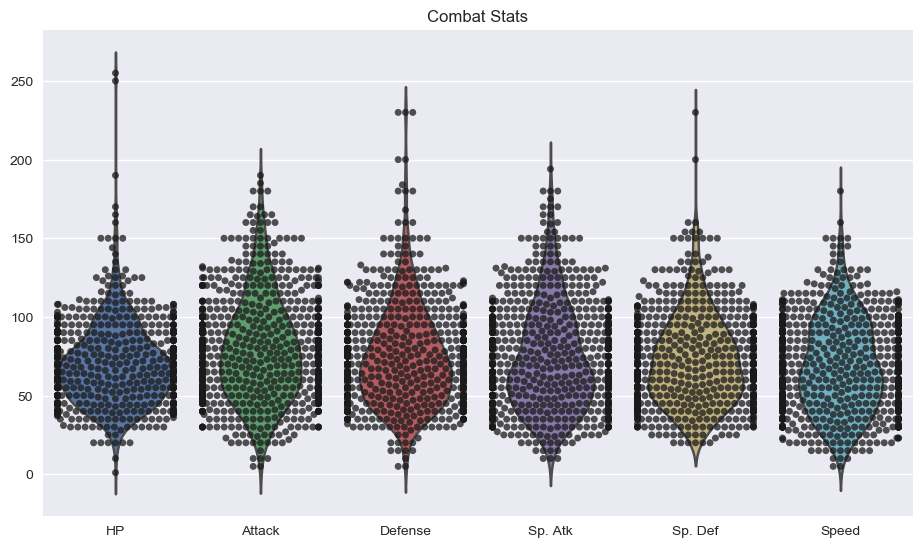

In [106]:
# Overlay swarm plot over violin plot

# Figure size
plt.figure(figsize=(10,6))

# Create violin plot without bars inside them ( inner = None )
sns.violinplot(data=combat_df, inner=None)

# Create swarm plot with points colored black ( color =  'k' )
# and make it little transparent ( alpha = '' )
sns.swarmplot(data=combat_df, color='k', alpha=0.75)

# Set title
plt.title('Combat Stats')
plt.show()

In [109]:
# Putting all datas together

# melt(data_frame, id_vars, var_name)
# _________________________________________________________________________________________
# data_frame = data frame to melt
# id_vars = ID variables to keep
# var_name = name of melted variable ()

# Drop ['Legendary', 'Generation'] from data_frame
# data_frame = data_frame.drop(['Legendary', 'Generation'], axis=1)


melted_df = pd.melt(data_frame, 
                   id_vars=['#', 'Name', 'Type 1', 'Type 2'],
                   var_name='Stat')


# Since we have melted six columns into one 'Stat', 
# Each previous row contains 6 rows in 'melted_df'

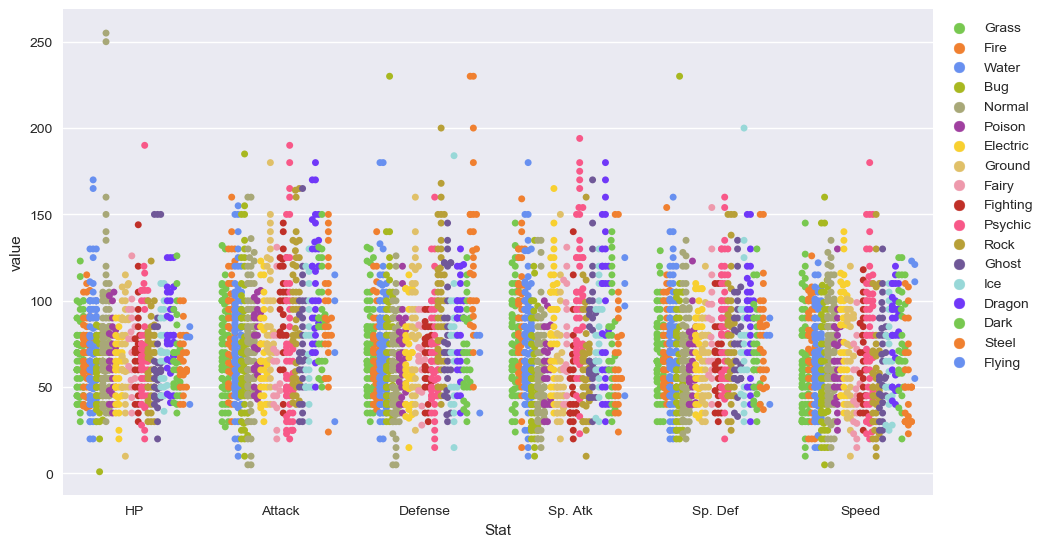

In [116]:
# swarmplot

plt.figure(figsize=(10,6))

# Pokemon type colors
pok_colors=[
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8',  # Dragon
]

# hue = 'Type 1' (Color points by Pokemon Type 1)
# dodge = True (To separate hue color map from plot)
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', palette=pok_colors, dodge=True)

# Place the legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

# -----------------------------------------------------------------------------------------------------

### MINI GALLARY

#### HEATMAP

- A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.
- Heatmaps can be used to show where users have clicked on a page, how far they have scrolled down a page, or used to display the results of eye-tracking tests.

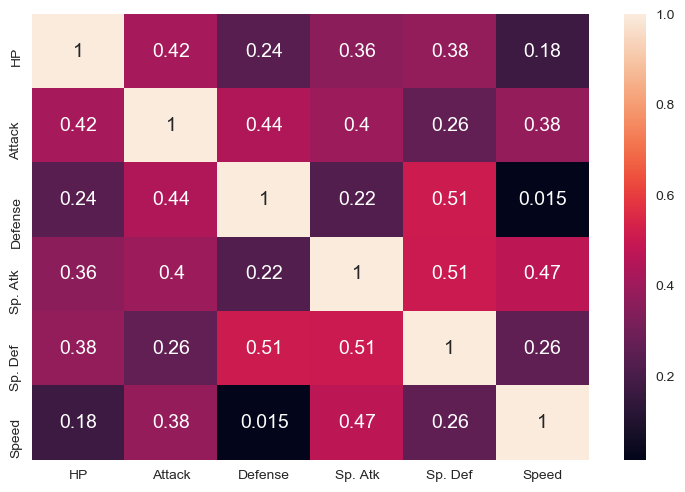

In [126]:
# It helps us to visualize matrix-like data

# Calculate correlations
corr = combat_df.corr()

# annot = True (To display correlation coeff.)
sns.heatmap(corr, annot=True)


plt.show()

### Histogram

Histograms allow you to plot the distributions of numeric variables.

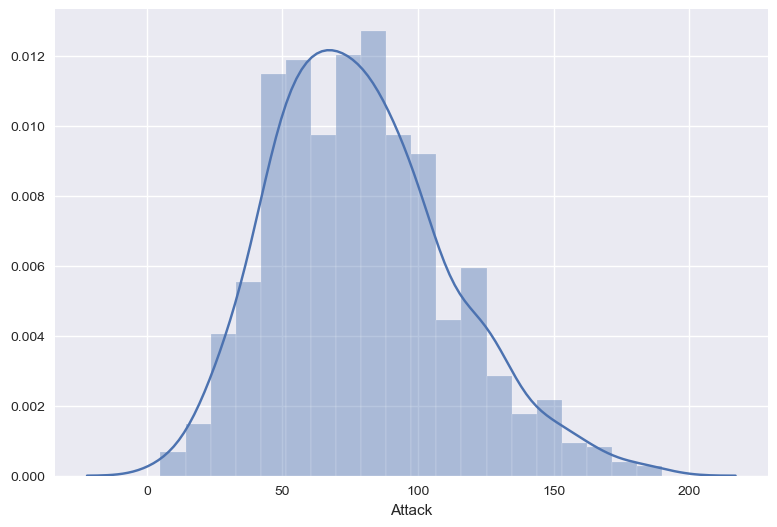

In [128]:
# Plot distribution plot (OR histogram)

sns.distplot(data_frame.Attack)

plt.tight_layout()
plt.show()

### BAR PLOTS

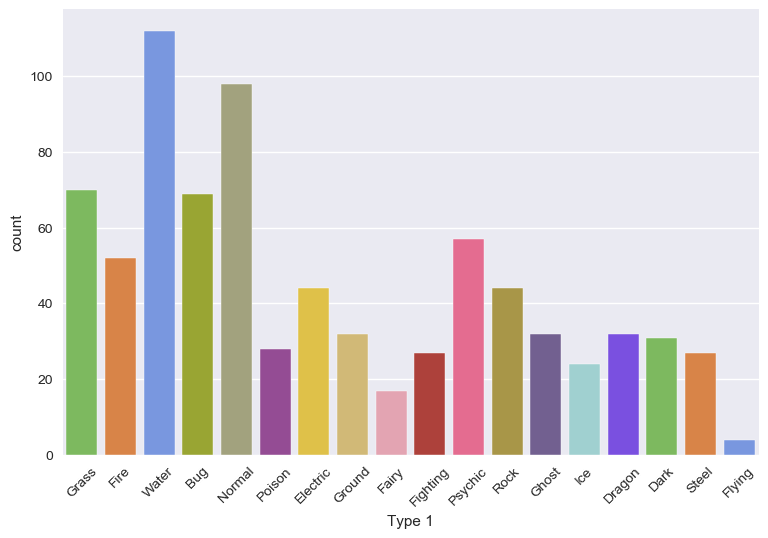

In [133]:
# countplot (OR bar plot)
sns.countplot(x='Type 1', data=data_frame, palette=pok_colors)

# Rotate the x label
plt.xticks(rotation=45)

plt.show()

### FACTOR PLOTS

Factor plots make it easy to separate plots by categorical classes.

<Figure size 1000x600 with 0 Axes>

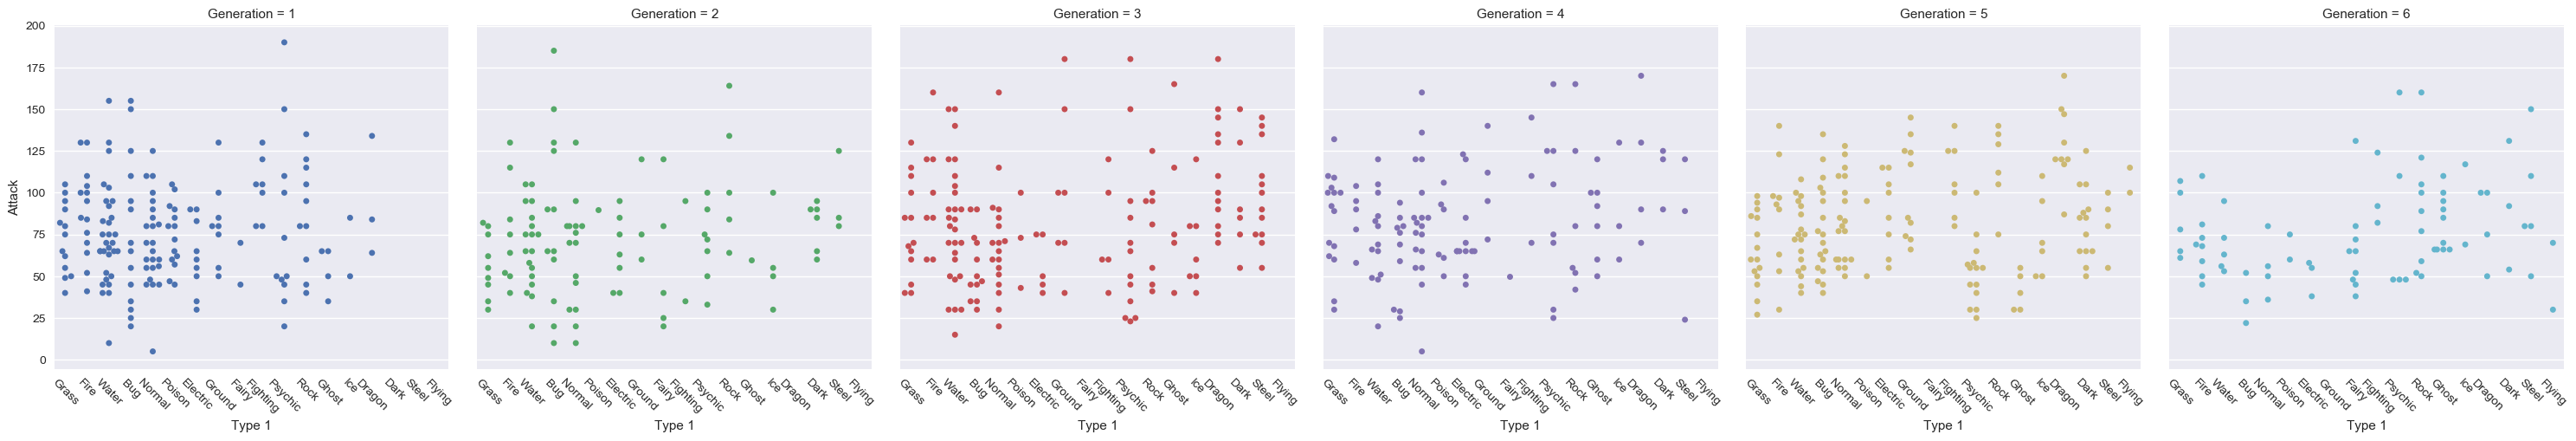

In [143]:
plt.figure(figsize=(10,6))

data_frame = pd.read_csv('pokemon_data.csv')

f = sns.factorplot(x='Type 1',
               y='Attack',
               data=data_frame, 
               hue='Generation', # Color  by 'Generation'
               col='Generation', # Separate by 'Generation'
               kind='swarm'      # Kind of plot 
              )

f.set_xticklabels(rotation=-45)

plt.show()

### DENSITY PLOTS

Density plots display the distribution between two variables.

NOTE: Consider overlaying this with a scatter plot.

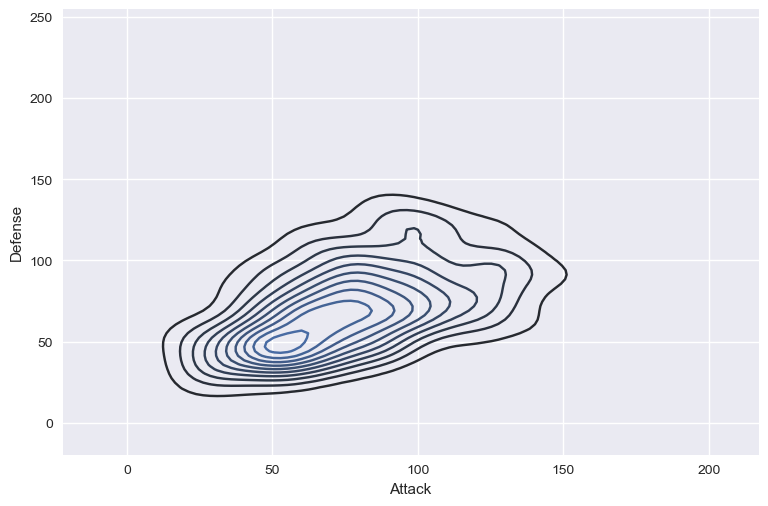

In [146]:
# Density Plot
sns.kdeplot(data_frame.Attack, data_frame.Defense)

plt.show()

###  Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

In [147]:
sns.jointplot(x='Attack', y='Defense', data=df)

plt.show()

NameError: name 'df' is not defined